In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv('temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df.shape

(348, 12)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,348.0,2016.000000,0.000000,2016.0,2016.000,2016.0,2016.000,2016.0
month,348.0,6.477011,3.498380,1.0,3.000,6.0,10.000,12.0
day,348.0,15.514368,8.772982,1.0,8.000,15.0,23.000,31.0
temp_2,348.0,62.652299,12.165398,35.0,54.000,62.5,71.000,117.0
temp_1,348.0,62.701149,12.120542,35.0,54.000,62.5,71.000,117.0
average,348.0,59.760632,10.527306,45.1,49.975,58.2,69.025,77.4
actual,348.0,62.543103,11.794146,35.0,54.000,62.5,71.000,92.0
forecast_noaa,348.0,57.238506,10.605746,41.0,48.000,56.0,66.000,77.0
forecast_acc,348.0,62.373563,10.549381,46.0,53.000,61.0,72.000,82.0
forecast_under,348.0,59.772989,10.705256,44.0,50.000,58.0,69.000,79.0


In [7]:
#We are taking this step for the purpose of visualization

import datetime as dt

years= df.year
months= df.month
days= df.day

dates= [str(year)+ '-' +str(month)+ '-' +str(day) for year, month, day in list(zip(years, months, days))]
dates= [dt.datetime.strptime(date, '%Y-%m-%d') for date in dates]

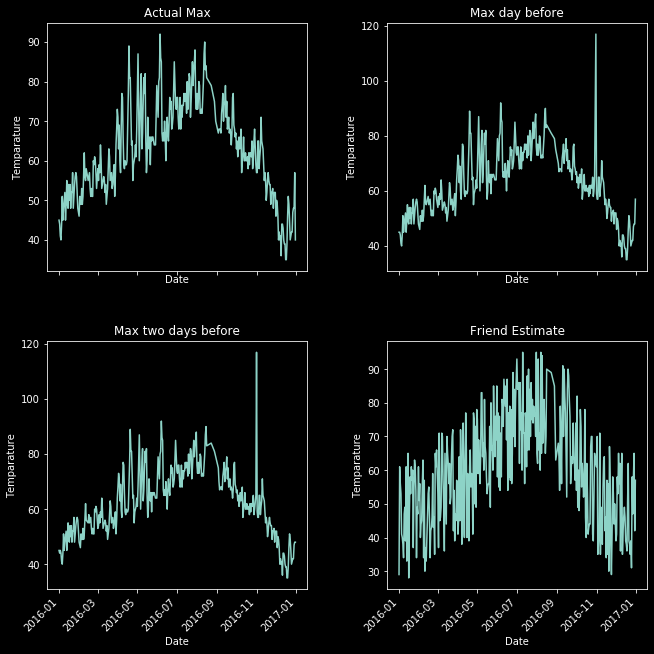

In [9]:
plt.style.use('dark_background')

fig, axes= plt.subplots(nrows=2, ncols=2, figsize= (10, 10))
fig.autofmt_xdate(rotation=45)

#Actual temp
axes[0,0].plot(dates, df.actual)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Temparature')
axes[0,0].set_title('Actual Max')

#Max temp a day before
axes[0,1].plot(dates, df.temp_1)
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Temparature')
axes[0,1].set_title('Max day before')

#Max temp two days before
axes[1,0].plot(dates, df.temp_2)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Temparature')
axes[1,0].set_title('Max two days before')

#Friend estimate
axes[1,1].plot(dates, df.friend)
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Temparature')
axes[1,1].set_title('Friend Estimate')

plt.tight_layout(pad=4)


In [10]:
df= pd.get_dummies(df)
df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [11]:
labels= np.array(df['actual'])

In [13]:
features= df.drop('actual', axis=1)

In [16]:
features_list= list(df.columns)
features= np.array(features)

In [18]:
train_all= df.copy()
train= train_all.loc[train_all.month<= 9]
valid= train_all.loc[train_all.month >9]
print(train.shape, valid.shape)

(257, 18) (91, 18)


In [19]:
target_col= features_list.pop(6)
in_cols= features_list


In [20]:
#Get our X and Y training and validation sets ready
X_train, y_train= train[in_cols], train[target_col]
X_valid, y_valid= valid[in_cols], valid[target_col]

In [21]:
print('Training Features Shape: ', X_train.shape)
print('Training Labels Shape: ', y_train.shape)
print('Testing Features Shape: ', X_valid.shape)
print('Testing Labels Shape: ', y_valid.shape)

Training Features Shape:  (257, 17)
Training Labels Shape:  (257,)
Testing Features Shape:  (91, 17)
Testing Labels Shape:  (91,)


In [22]:
#Using scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Split data into training and testing sets
train_features, test_features, train_labels, test_labels= train_test_split(features, labels, 
                                                                          test_size=0.25, random_state= 42)

In [23]:
#The baseline predictions are the historical averages
baseline_preds= test_features[:, features_list.index('average')]

#Baseline errors, and average average baseline error
baseline_errors= abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  5.06 degrees.


In [24]:
from sklearn.svm import SVC
model= SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
pred= model.predict(X_valid)

In [26]:
errors= abs(pred-y_valid)
print(f'Mean Absolute Error is: {round(np.mean(errors),2)}')

Mean Absolute Error is: 14.15


In [30]:
mape= 100*(errors/y_valid)
accuracy= 100- np.mean(mape)
print(f'Accuray: {round(accuracy)}%')

Accuray: 70%


In [32]:
param_grid= {'C': [0.1, 1, 10, 100, 1000]
            ,'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, verbose=5 )

In [33]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    6.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [34]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [35]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
pred= grid.predict(X_valid)
errors= abs(pred-y_valid)
print(f'Mean Absolute Error is: {round(np.mean(errors),2)}')

Mean Absolute Error is: 4.99


In [37]:
mape= 100*(errors/y_valid)
accuracy= 100- np.mean(mape)
print(f'Accuray: {round(accuracy)}%')

Accuray: 90%
